In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mu2e import validation
val = validation.BenchmarkGenerator()

In [ ]:
orig_default =  val.check_retrieval("default")

In [ ]:
orig_argo = val.check_retrieval("argo")

In [ ]:
orig_qa = val.check_retrieval("multi-qa")

In [ ]:
chatlas_default = val.check_chATLAS("default") 

In [ ]:
chatlas_argo = val.check_chATLAS("argo")

In [ ]:
chatlas_qa = val.check_chATLAS("multi-qa")

In [12]:
def retrieval_within_n(n, distance_data):
    count = 0
    for distance in distance_data:
        if distance <= n:
            count+=1
    return count

def top_n(n, position_data):
    count = 0
    for position in position_data:
        if 0 <= position <= n:
            count += 1
    return count

In [10]:
import pandas as pd
orig_default['distance'] = pd.to_numeric(orig_default['distance'], errors='coerce')
orig_argo['distance'] = pd.to_numeric(orig_argo['distance'], errors='coerce')
orig_qa['distance'] = pd.to_numeric(orig_qa['distance'], errors='coerce')

l1 = len(orig_default['distance']))
l2 = len(orig_argo['distance']))
l3 = len(orig_qa['distance']))

chatlas_default['distance'] = pd.to_numeric(chatlas_default['distance'], errors='coerce')
chatlas_argo['distance'] = pd.to_numeric(chatlas_argo['distance'], errors='coerce')
chatlas_qa['distance'] = pd.to_numeric(chatlas_qa['distance'], errors='coerce')


l4 = len(chatlas_default['distance']))
l5 = len(chatlas_argo['distance']))
l6 = len(chatlas_qa['distance']))



159
159
159
132
132
132


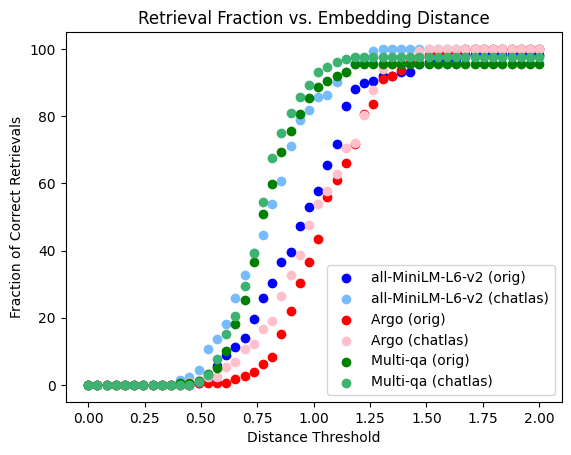

In [25]:
import numpy as np
import matplotlib.pyplot as plt
thresholds = np.linspace(0, 2.0, 50)
default_vals_orig = [(retrieval_within_n(t, orig_default['distance'])/l1)*100 for t in thresholds]
default_vals_chatlas = [(retrieval_within_n(t, chatlas_default['distance'])/l4)*100 for t in thresholds]

argo_vals_orig = [(retrieval_within_n(t, orig_argo['distance'])/l2)*100 for t in thresholds]
argo_vals_chatlas = [(retrieval_within_n(t, chatlas_argo['distance'])/l5)*100 for t in thresholds]

qa_vals_orig = [(retrieval_within_n(t, orig_qa['distance']/40)/l3)*100 for t in thresholds]
qa_vals_chatlas = [(retrieval_within_n(t, chatlas_qa['distance']/40)/l6)*100 for t in thresholds]


plt.scatter(thresholds, default_vals_orig, label="all-MiniLM-L6-v2 (orig)", color='blue')
plt.scatter(thresholds, default_vals_chatlas, label="all-MiniLM-L6-v2 (chatlas)", color='xkcd:sky blue')

plt.scatter(thresholds, argo_vals_orig, label="Argo (orig)", color='red')
plt.scatter(thresholds, argo_vals_chatlas, label="Argo (chatlas)", color='pink')

plt.scatter(thresholds, qa_vals_orig, label="Multi-qa (orig)", color='green')
plt.scatter(thresholds, qa_vals_chatlas, label="Multi-qa (chatlas)", color='mediumseagreen')


plt.xlabel("Distance Threshold")
plt.ylabel("Fraction of Correct Retrievals")
plt.title("Retrieval Fraction vs. Embedding Distance")
plt.legend()
plt.show()

In [27]:
top_def_orig = []
for n in range(7000):
    top_def_orig.append((n, top_n(n, orig_default['position'])))
x_def_orig, y_def_orig = zip(*top_def_orig)
y_scaled_def_orig = [(y/l1)*100 for y in y_def_orig]

top_def_chatlas = []
for n in range(7000):
    top_def_chatlas.append((n, top_n(n, chatlas_default['position'])))
x_def_chatlas, y_def_chatlas = zip(*top_def_chatlas)
y_scaled_def_chatlas = [(y/l4)*100 for y in y_def_chatlas]

top_argo_orig = []
for n in range(7000):
    top_argo_orig.append((n, top_n(n, orig_argo['position'])))
x_argo_orig, y_argo_orig = zip(*top_argo_orig)
y_scaled_argo_orig = [(y/l2)*100 for y in y_argo_orig]

top_argo_chatlas = []
for n in range(7000):
    top_argo_chatlas.append((n, top_n(n, chatlas_argo['position'])))
x_argo_chatlas, y_argo_chatlas = zip(*top_argo_chatlas)
y_scaled_argo_chatlas = [(y/l5)*100 for y in y_argo_chatlas]


top_qa_orig = []
for n in range(7000):
    top_qa_orig.append((n, top_n(n, orig_qa['position'])))
x_qa_orig, y_qa_orig = zip(*top_qa_orig)
y_scaled_qa_orig = [(y/l3)*100 for y in y_qa_orig]

top_qa_chatlas = []
for n in range(7000):
    top_qa_chatlas.append((n, top_n(n, chatlas_qa['position'])))
x_qa_chatlas, y_qa_chatlas = zip(*top_qa_chatlas)
y_scaled_qa_chatlas = [(y/l6)*100 for y in y_qa_chatlas]

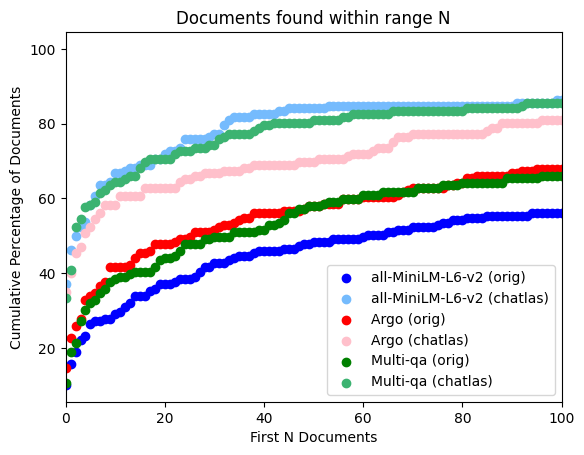

In [29]:
import matplotlib.pyplot as plt
plt.xlabel("First N Documents")
plt.ylabel("Cumulative Percentage of Documents")
plt.title("Documents found within range N")

plt.scatter(x_def_orig, y_scaled_def_orig, label="all-MiniLM-L6-v2 (orig)", color='blue')
plt.scatter(x_def_chatlas, y_scaled_def_chatlas, label="all-MiniLM-L6-v2 (chatlas)", color='xkcd:sky blue')

plt.scatter(x_argo_orig, y_scaled_argo_orig, label="Argo (orig)", color='red')
plt.scatter(x_argo_chatlas, y_scaled_argo_chatlas, label="Argo (chatlas)", color='pink')

plt.scatter(x_qa_orig, y_scaled_qa_orig, label="Multi-qa (orig)", color='green')
plt.scatter(x_qa_chatlas, y_scaled_qa_chatlas, label="Multi-qa (chatlas)", color='mediumseagreen')


plt.xlim(0, 100)
#plt.ylim(0, 70)
plt.legend()